In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ocr-image-processing/virat1.jpg
/kaggle/input/ocr-image-processing/text_bicubic_y.png
/kaggle/input/ocr-image-processing/Image_processing_notebook.ipynb
/kaggle/input/ocr-image-processing/image2.png


In [2]:
import pytesseract
from pytesseract import Output
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

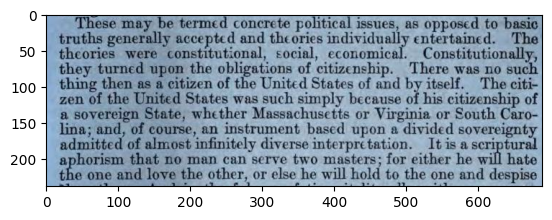

In [3]:
image = cv2.imread('/kaggle/input/ocr-image-processing/image2.png')

plt.imshow(image)

# Extracting text using OCR

In [4]:
text = pytesseract.image_to_string(image)
print(text)

These may be termed concrete political issues, as opposed to basic
truths generally accepted and theories iateeadaaly entertained. The
theories were constitutional, social, economical. Constitutionally,
they turned upon the obligations of citizenship. There was no such
thing then as a citizen of the United States of and by itself. The citi-
zen of the United States was such simply because of his citizenship of
a sovereign State, whether Massachusetts or Virginia or South Caro-
lina; and, of course, an instrument based upon a divided sovereignty
admitted of almost infinitely diverse interpretation. It is a scriptural
aphorism that no man can serve two masters; for either he will hate
the one and love the other, or else he will hold to the one and despise

 



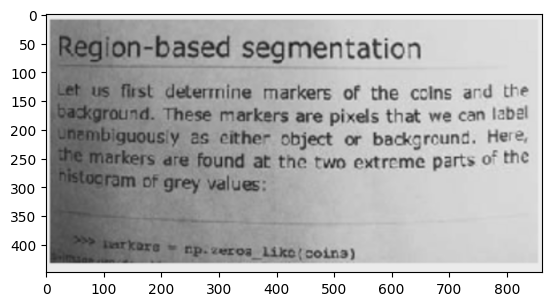

In [5]:
image1 = cv2.imread('/kaggle/input/ocr-image-processing/text_bicubic_y.png')
plt.imshow(image1)

In [6]:
text1 = pytesseract.image_to_string(image1)
print(text1)

  
 

line markers of the colns ard the

rs are pixels that we can label
Object or background. Here,
the two extreme parts of the



**Since we are not able to extract text from image clearly, let's try to improve the result using pre-processing techniques.**

**Pre-processing Techniques:**
* Increasing resolution: Increase the resolution of image
* Deskewing: Deskew/tilt the image. It also makes it easier to do more processing
* Blurring: It is useful to remove the noise
* Convert to Black and White: Convert the image into black and White after deskewing and resizing it. It will produce consistent character size and thickness.
* Remove Noise:Remove noise from Black and White image. Perform operations like morphological transformation, contours etc. to remove the noise.
* Train Tesseract on the Font

**Converting to Grayscale for better preprocessing**

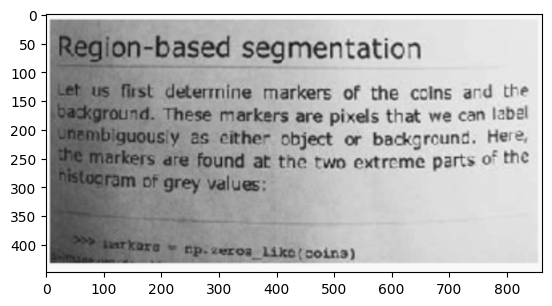

In [7]:
gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

# Smoothening using blur

There is no need to do descrewing as the fonts are almost straight. The resolution of the image is also good.

1. Gaussian Noise: Gaussian Noise is modeled by adding random values to an image. Gausiann filter helps in removing Gausian Noise from the image.
2. Salt and Pepper Noise: An image containing salt-and-pepper noise will have dark pixels in bright region and bright pixels in dark regions. Median Filter helps in removing salt and pepper noise.

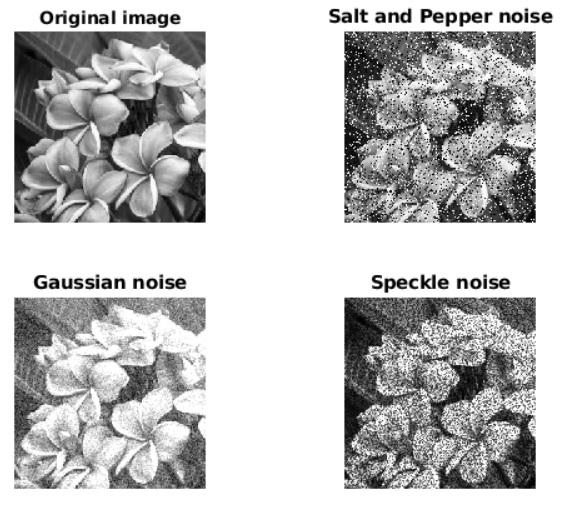

3. Let's blur the image for smoothing using a) Glaussian blur and b) Median Blur



**Gaussian Blur**

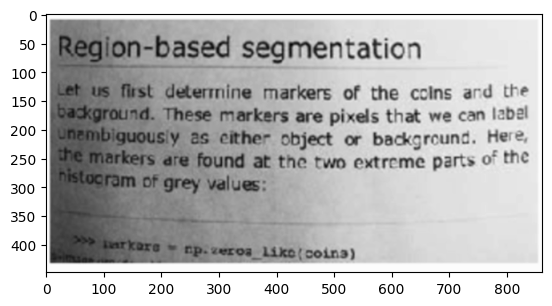

In [8]:
gaussian = cv2.GaussianBlur(gray, (3,3), 0)
plt.imshow(gaussian, cmap='gray')

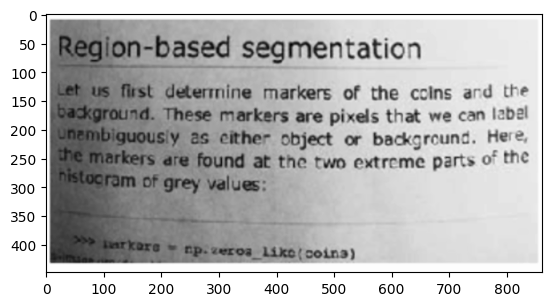

In [9]:
median = cv2.medianBlur(gray,3)
plt.imshow(median, cmap='gray')

Not much of difference between gaussian blur and median blur and we can conclude it didn't add much of values to the images as we expected.

In [10]:
text_gaussian = pytesseract.image_to_string(gaussian)
print(text_gaussian)

text_median = pytesseract.image_to_string(median)
print(text_median)

 
   
  
 

ased segmentation

une markers of the ccins and the

cers are pixels that we can label
ther object or background. Here,
ont the two extreme parts of the

  
    
 

ae _ of the coins and the
are pixels that we can label
ther object or background. Here,
J i the two extreme parts of the



***Results have slightly improved, but still they aren't good enough. Let's do further preprocessing***

# **Thresholding the Image**

The images after smoothing gets blurred. Generally, for OCR to work better, we want sharp borders between characters with high contrast. Binarization makes the image sharp. Also, it reduces the size of the image, which helps in preprocessing in OCR. Some of the thresholding techniques are:

1. Simple Thresholding
2. Adaptive Thresholding
3. Otsu's Binarization

# Simple Thresholding

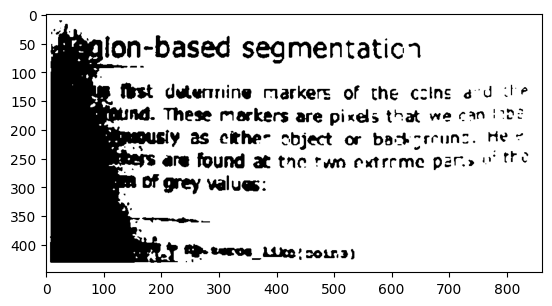

In [11]:
ret, simple_threshold = cv2.threshold(median,127,255, cv2.THRESH_BINARY)
plt.imshow(simple_threshold, cmap= 'gray')

# Adaptive Thresholding

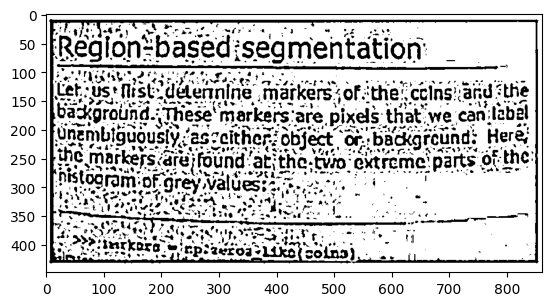

In [12]:
adaptive_threshold_mean = cv2.adaptiveThreshold(median, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
plt.imshow(adaptive_threshold_mean, cmap='gray')

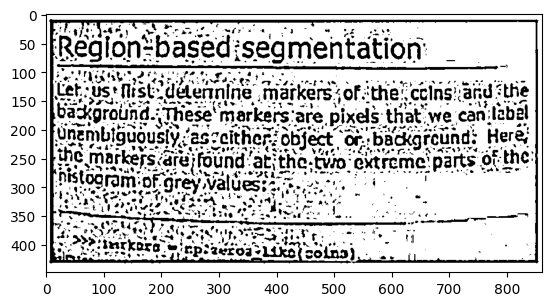

In [13]:
adaptive_threshold_Gaussian = cv2.adaptiveThreshold(median, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
plt.imshow(adaptive_threshold_Gaussian, cmap='gray')

# Otsu's Thresholding

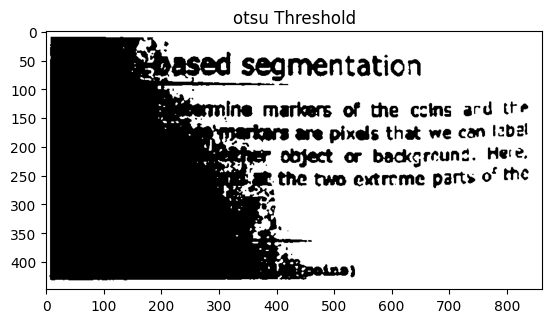

In [14]:
ret2,otsu_threshold = cv2.threshold(median,0,255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.title('otsu Threshold')
plt.imshow(otsu_threshold, cmap='gray')

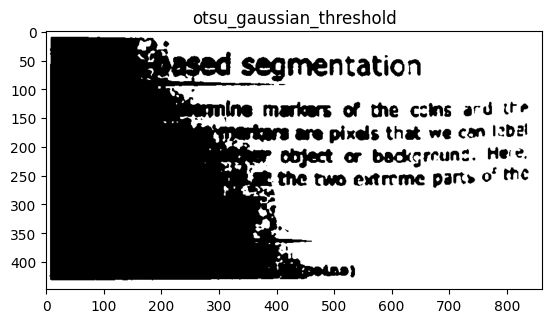

In [15]:
blur=cv2.GaussianBlur(median, (5,5),0)
ret3, otsu_gaussian_threshold = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.title('otsu_gaussian_threshold')
plt.imshow(otsu_gaussian_threshold, cmap='gray')

Since adaptive thresholding gave better results we will be utilising that.

# Morphological Transformations

Morphological transformations is normally performed on binary images. It needs two inputs, one is the image, other is the structuring element or kernel which decides the nature of operation. Two basic morphological operations are Erosion and Dilation.

Dilation adds pixels to the boundaries of objects in an image, while erosion removes pixels on object boundaries. The number of pixels added or removed from the objects in an image depends on the size and shape of the structuring element used to process the image.

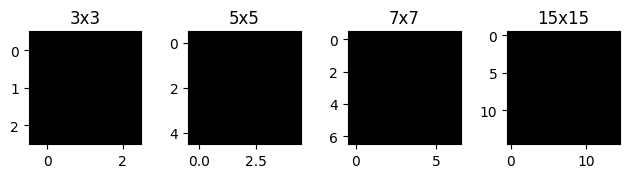

In [16]:
strucEle3x3 = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
strucEle5x5 = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
strucEle7x7 = cv2.getStructuringElement(cv2.MORPH_RECT,(7,7))
strucEle15x15 = cv2.getStructuringElement(cv2.MORPH_RECT,(15,15))

# Define figure and subplots
fig, axes = plt.subplots(1, 4)

# Plot each structuring element
axes[0].imshow(strucEle3x3, cmap='gray')
axes[0].set_title("3x3")
#axes[0].set_aspect('equal')

axes[1].imshow(strucEle5x5, cmap='gray')
axes[1].set_title("5x5")
#axes[1].set_aspect('equal')

axes[2].imshow(strucEle7x7, cmap='gray')
axes[2].set_title("7x7")
#axes[2].set_aspect('equal')

axes[3].imshow(strucEle15x15, cmap='gray')
axes[3].set_title("15x15")
#axes[3].set_aspect('equal')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

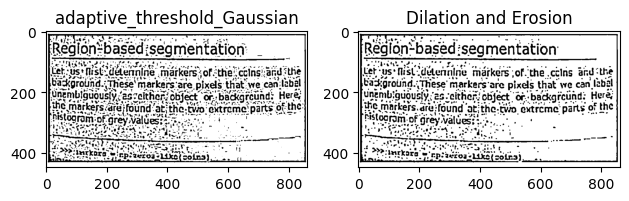

In [17]:
for i in range(2):
    imgThresh = cv2.dilate(adaptive_threshold_Gaussian, strucEle3x3, iterations = 1)
    imgThresh = cv2.erode(imgThresh,strucEle3x3,iterations = 1)

fig, axes = plt.subplots(1,2)
axes[0].imshow(adaptive_threshold_Gaussian, cmap='gray')
axes[0].set_title('adaptive_threshold_Gaussian')

axes[1].imshow(imgThresh, cmap='gray')
axes[1].set_title('Dilation and Erosion')

plt.tight_layout()
plt.show()

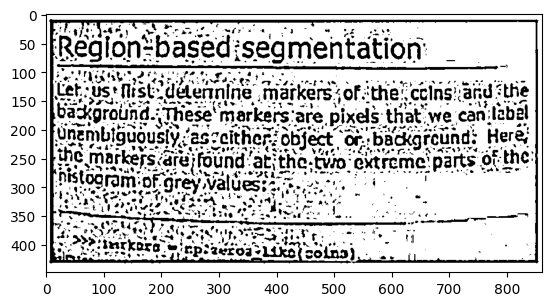

In [18]:
plt.imshow(adaptive_threshold_Gaussian, cmap= 'gray')

In [19]:
tex = pytesseract.image_to_string(imgThresh)
print(tex)

Region’ “based: segmentation

us" “nist dtenninie. tithes of. ‘the .cclns aru: ‘the

soe eo Ss vee
Unembiguously2s r bject. oF: ‘backgfciind: iter

the markets.. ound ‘at; the. 0, extreme. parts of the
Ni ;

 



#### Performing more dilation and erosion, the characters will detoriate. As you can see, because of dots, the result have deteroiated instead of improving 

# Contours

**Contours is an outline representing or bounding the shape or form of something. It is a curve joining all the continuous points (along the boundary), having same color or intensity. Here, we will identify the shape of the dots using contours and remove it. Once we find all the shapes/contours, we will identify the dots which will have shapes having areas less than certain number, aspect ratio etc.**

# Reverse the image

**Generally, the object that we want to identify should be in white and background should be in black when using contours. So, revering the image to convert it in required format.**

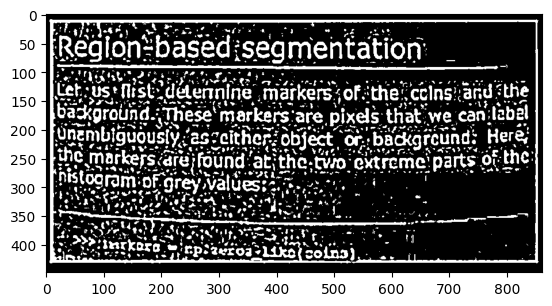

In [20]:
image_reverse = cv2.bitwise_not(adaptive_threshold_Gaussian)
plt.imshow(image_reverse, cmap='gray')

### **Function to draw and show contours**

In [21]:
def drawAndShowContours(wd,ht,contours,strImgName):
    global SCALAR_WHITE
    global SHOW_DEBUG_STEPS

# Defining a blank frame. Since it is initialised with zeros, it will be black
    blank_image = np.zeros((ht,wd, 3), np.uint8)
    #cv2.drawContours(blank_image,contours,10,SCALAR_WHITE,-1)
    # Adding all possible contour to the blank frame 
    # Contour is white 
    #cv2.drawContours(blank_image,contours,10,SCALAR_WHITE,-1)
    cv2.drawContours(blank_image, contours, -1, (0, 255, 0), thickness=2)
    #cv2.fillPoly(blank_image, contours, (0, 255, 0))

    #plt.imshow(blank_image, cmap = 'gray')
    # For better clarity, lets just view countour 9
    blank_image_contour_9 = np.zeros((ht,wd), np.uint8)
    
    # Let's just add contour 9th to the blank image and view it
    cv2.drawContours(blank_image_contour_9, contours, 8, (0, 255, 0), thickness=2)

        # Print the dimensions of the images
    print("blank_image dimensions:", blank_image.shape)
    print("blank_image_contour_9 dimensions:", blank_image_contour_9.shape)
    # Plotting
    #plot_image([blank_image, blank_image_contour_9], cmap='gray', captions = ["All possible contours", "Only the 9th contour"])
    
    fig, axes= plt.subplots(1,2)
    
    axes[0].imshow(blank_image)
    axes[0].set_title('All contours')
    
    axes[1].imshow(blank_image_contour_9)
    axes[1].set_title('only_contour_9')
        
    plt.tight_layout()
    plt.show()
    
   # return blank_image

In [22]:
major_number = cv2.__version__[0]

contours.shape: 1601
blank_image dimensions: (448, 862, 3)
blank_image_contour_9 dimensions: (448, 862)


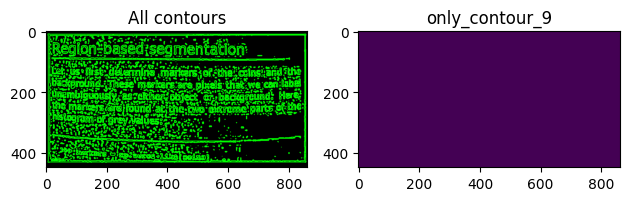

In [23]:
#SCALAR_WHITE = (255, 255, 255) 

ht = np.size(image_reverse, 0)
wd = np.size(image_reverse, 1)

if major_number == '4':
    contours, hierarchy = cv2.findContours(image_reverse, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
else:
    _, contours, hierarchy = cv2.findContours(image_reverse, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
print('contours.shape:', len(contours))
im2 = drawAndShowContours(wd, ht, contours, 'imgContours')


In [24]:
class Blob:
    currentContour = [[0,0]]
    
    # First, let's define the 'Blob' function, which creates a 'Blob', with all the necessary parameters
    
    def Blob(self,_contour):
        self.currentContour = _contour
        self.currentBoundingRect = cv2.boundingRect(_contour) 

In [25]:
def drawAndShowBlobs(wd,ht,blobs,strImgName):
    global SCALAR_WHITE
    global SHOW_DEBUG_STEPS
    blank_image = np.zeros((ht,wd,3), np.uint8)
    
    contours=[]
    for blob in blobs:
        contours.append(blob.currentContour)
    #print("C is", contours)  
    contours.pop(0)
    #print("contours ", contours)
    cv2.drawContours(blank_image,contours,-1,(0,255,0),thickness=cv2.FILLED)
    

    plt.imshow(blank_image, cmap = 'gray')
         
    return blank_image 

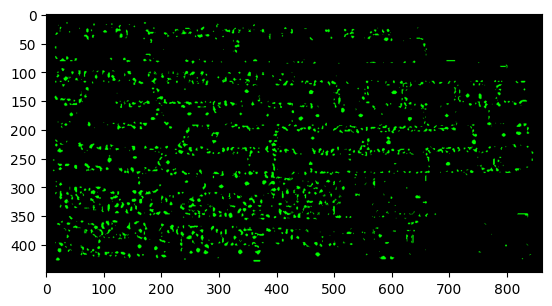

In [26]:
blob = Blob()
blobs = [blob]

area = 36

for contour in contours:
    # This is an instance of the class Blob()
    possiBlob = Blob()
    # This is the Blob function inside the class Blob()
    possiBlob.Blob(contour) # does it work? yes
    contourArea = cv2.contourArea(contour)
    if(contourArea < area):
        blobs.append(possiBlob)

# Now, using the hulls, we draw the blob objects.

dots = drawAndShowBlobs(wd,ht,blobs,'Blobs')

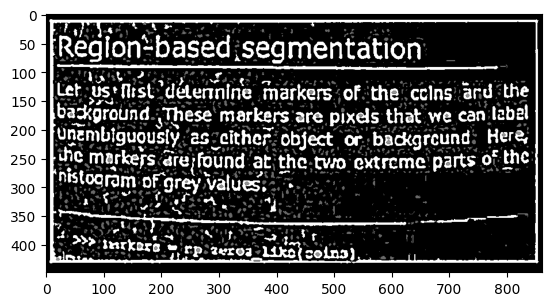

In [27]:
dots_ = cv2.cvtColor(dots, cv2.COLOR_BGR2GRAY)
imgDiff = cv2.absdiff(dots_, image_reverse)
plt.imshow(imgDiff, cmap = 'gray')

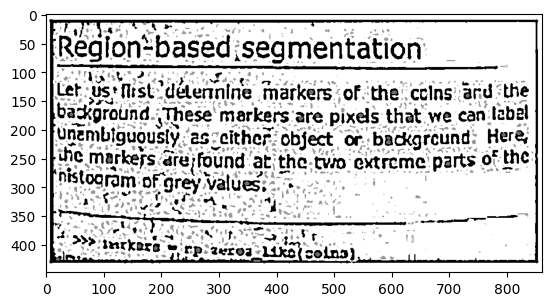

In [28]:
image_clean = cv2.bitwise_not(imgDiff)
plt.imshow(image_clean, cmap = 'gray')

In [29]:
text = pytesseract.image_to_string(image_clean)

print(text)

Region*based isegmentation
Let ‘us flist’ déterininte Tarkers (ofthe cclns)and ‘the

unembiguously as-cither: object or.:backgreund: Here

ihe markefs drejfound a atithe.tvio extreme parts of the
rstoaram of rarey Values. *

 

